In [25]:
import pandas as pd
import numpy as np
import os,sys
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-important-customers/data/raw/train_df.csv')

df.drop(['id'],axis=1,inplace=True)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import VarianceThreshold

transformer_1 = ColumnTransformer(
    transformers = [('tnf1', SimpleImputer(strategy='mean'), [0]),
                    ('tnf2', SimpleImputer(strategy='median'), [6]),
                    ('tnf3', SimpleImputer(strategy='most_frequent'), [7,10,12,15,16,22])
                    ],
     remainder = 'passthrough'
).set_output(transform='pandas')

transformer_2 = ColumnTransformer(
    transformers = [('trf4', OneHotEncoder(sparse=False,drop='first'),[2])],
    remainder = 'passthrough'
).set_output(transform='pandas')

transformer_3 = ColumnTransformer(
    transformers = [('trf5', RobustScaler(),[1,8,9,11,18,19,23,24,25]),
                   ('trf6', MinMaxScaler(),[0,2,3,4,5,6,7,10,12,13,14,15,16,17,20,21,22])
                   ],
    remainder = 'passthrough'
).set_output(transform='pandas')

transformer_4 = ColumnTransformer(
    transformers = [('trf6', VarianceThreshold(threshold=0.05),[i for i in range(df.shape[1])])],
    remainder = 'passthrough'
).set_output(transform='pandas')

pipe = Pipeline(
    [
        ('transformer_1', transformer_1),
        ('transformer_2', transformer_2),
        ('transformer_3', transformer_3),
        ('transformer_4', transformer_4)
    ]
)

df_train = pipe.fit_transform(df_train)

extracted_names = [col.split('__')[-1] for col in df_train.columns]

df_train.columns = extracted_names
df_train.head()

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['important_customer'],axis=1),df_train['important_customer'], test_size = 0.2,
                 random_state=42)

## K-Means

In [4]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [5]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

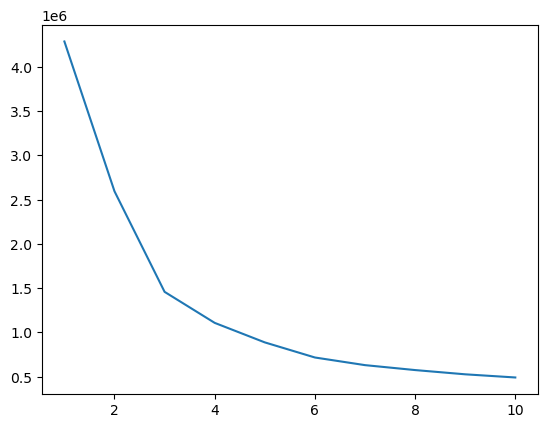

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
sil_score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(X_train)
    sil = silhouette_score(X_train, cluster_labels)
    sil_score.append(sil)

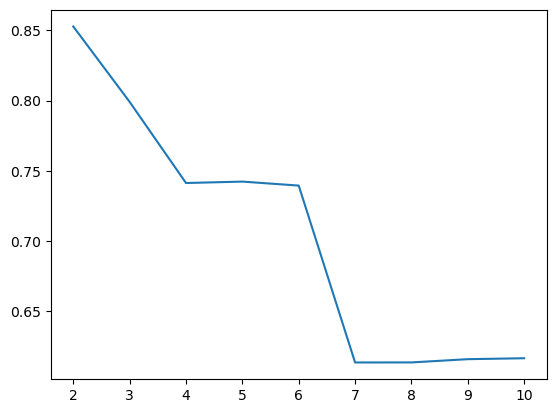

In [9]:
plt.plot(range(2,11),sil_score)

In [10]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X_train)

In [11]:
X_train['cluster_number'] = y_kmeans

X_train['cluster_number'].value_counts()

cluster_number
0    10471
2      644
1       85
Name: count, dtype: int64

## Mini Batch KMeans

In [16]:
from sklearn.cluster import MiniBatchKMeans

wcss = []
for i in range(1,11):
    mini_batch = MiniBatchKMeans(n_clusters=i, batch_size=1000)
    mini_batch.fit(X_train)
    wcss.append(mini_batch.inertia_)

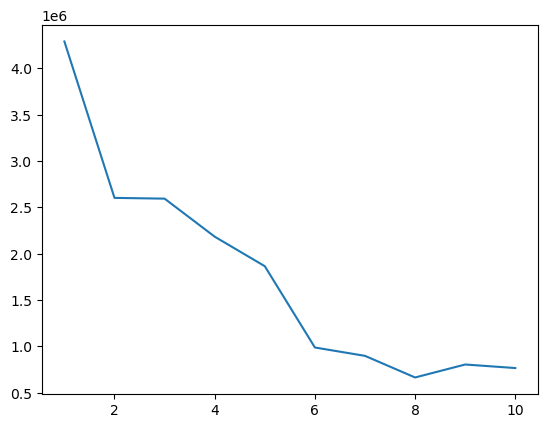

In [17]:
plt.plot(range(1,11),wcss)

## DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
db = DBSCAN(eps=3, min_samples=2)

db.fit(X_train)

DBSCAN(eps=3, min_samples=2)

In [23]:
sil_score = []

for i in range(2,11):
    db = DBSCAN(min_samples=i)
    cluster_labels = db.fit_predict(X_train)
    sil = silhouette_score(X_train, cluster_labels)
    sil_score.append(sil)

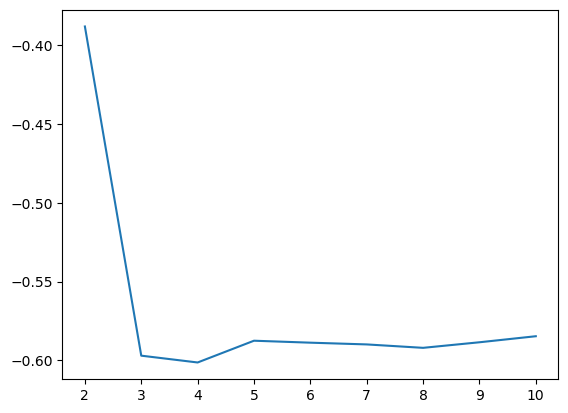

In [24]:
plt.plot(range(2,11),sil_score)

## Hierarchical Clustering

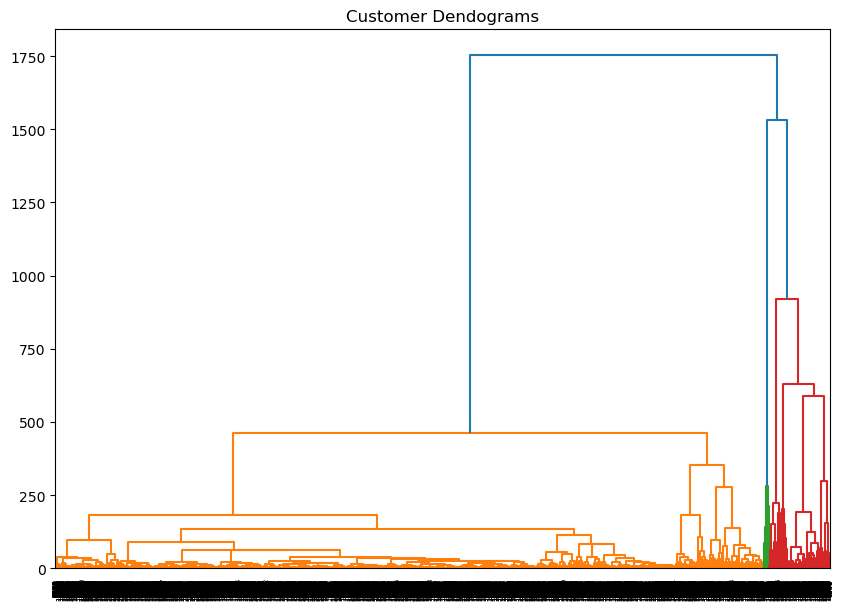

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X_train, method='ward'))

In [27]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [28]:
labels = cluster.fit_predict(X_train)

In [29]:
sil_score = []

for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = cluster.fit_predict(X_train)
    sil = silhouette_score(X_train, cluster_labels)
    sil_score.append(sil)

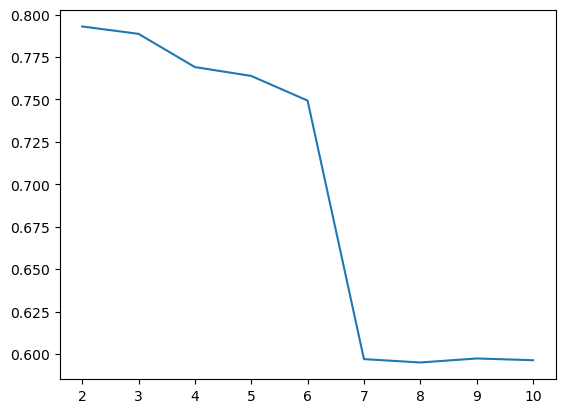

In [30]:
plt.plot(range(2,11),sil_score)